In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import metrics

df = pd.read_csv('final_fi_data.csv')
df

,gender,age,no_of_people_contribute_income,relationship_status,children_status,financially_independent,occupation,housing situation,have_roomates,country,...,spending_habits,frugality,logical_thinking,creativity,drive_for_self_improvement,importance_of_relationship,internet_consumption,introversion,religiousness_level,response_release_consent
0,Male,26,1,"In a relationship, but not married",Plan Children,No,"Licensed Professional (Attorney, Accountant, E...",Rent,No,United States of America,...,Yes,4,4,2,4,5,4,5,2,Yes
1,Male,37,2,"In a relationship, but not married",Have Children,No,Legal Occupations,Own,No,Sweden,...,Yes,2,5,3,5,4,4,1,1,Yes
2,Male,20,1,"Single, never married",Undecided,No,Computer and Mathematical Occupations - Softwa...,Rent,Yes,United States of America,...,Yes,4,5,4,4,3,5,4,2,Yes
3,Male,26,1,"Single, never married",Undecided,No,Computer and Mathematical Occupations - Softwa...,Rent,Yes,United States of America,...,Yes,5,5,4,4,4,5,3,1,Yes
4,Male,24,1,"In a relationship, but not married",Undecided,No,Business and Financial Operations Occupations,Rent,Yes,United States of America,...,Yes,4,5,2,3,4,2,4,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,Male,23,2,Married,Plan Children,No,Architecture and Engineering Occupations,Rent,No,United States of America,...,Yes,3,4,3,4,4,3,4,1,Yes
1171,Male,22,1,"In a relationship, but not married",Plan Children,No,Production and Manufacturing Occupations,Rent,No,United States of America,...,Yes,3,5,4,2,5,5,5,1,Yes
1172,Male,27,2,Married,Plan Children,No,Business and Financial Operations Occupations,Own,No,United States of America,...,Yes,4,5,3,3,2,3,2,2,Yes
1173,Male,26,2,Married,Plan Children,No,"Licensed Professional (Attorney, Accountant, E...",Rent,No,United States of America,...,Yes,4,5,4,5,5,3,4,5,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 1175 non-null   object 
 1   age                                    1175 non-null   int64  
 2   no_of_people_contribute_income         1175 non-null   int64  
 3   relationship_status                    1175 non-null   object 
 4   children_status                        1175 non-null   object 
 5   financially_independent                1175 non-null   object 
 6   occupation                             1175 non-null   object 
 7   housing situation                      1175 non-null   object 
 8   have_roomates                          1175 non-null   object 
 9   country                                1175 non-null   object 
 10  living environment                     1175 non-null   object 
 11  comm

In [3]:
df.describe()

,age,no_of_people_contribute_income,gross_annual_wage,total_portfolio,amount_for_fi,amount_for_re,curr_percentage_of_fi,age_when_financially_literate,age_when_learnt_about_fi,frugality,logical_thinking,creativity,drive_for_self_improvement,importance_of_relationship,internet_consumption,introversion,religiousness_level
count,1175.000000,1175.000000,1.175000e+03,1.175000e+03,1.175000e+03,1.175000e+03,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,29.111489,1.388936,1.464334e+05,3.715859e+05,1.262480e+06,2.049321e+06,19.621726,21.460426,26.058723,3.662128,4.504681,3.027234,3.731915,3.640851,4.235745,3.448511,1.583830
std,5.956143,0.524734,4.577358e+05,3.170687e+06,1.183351e+06,3.692593e+06,22.712342,6.070982,5.651201,0.834144,0.633884,1.032326,0.916698,1.019586,0.792694,1.082868,1.073727
min,18.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,1.000000,7.120000e+04,3.825000e+04,6.825000e+05,1.000000e+06,4.800000,18.000000,22.000000,3.000000,4.000000,2.000000,3.000000,3.000000,4.000000,3.000000,1.000000
50%,28.000000,1.000000,1.030000e+05,1.000000e+05,1.000000e+06,1.500000e+06,10.600000,22.000000,25.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,1.000000
75%,32.000000,2.000000,1.530000e+05,2.556900e+05,1.500000e+06,2.000000e+06,25.000000,25.000000,29.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,2.000000
max,63.000000,4.000000,1.500000e+07,1.000000e+08,1.800000e+07,1.000000e+08,100.000000,100.000000,60.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df['gender'].unique()

array(['Male', 'Female', 'Other (please specify)'], dtype=object)

In [5]:
df.columns

Index(['gender', 'age', 'no_of_people_contribute_income',
       'relationship_status', 'children_status', 'financially_independent',
       'occupation', 'housing situation', 'have_roomates', 'country',
       'living environment', 'commute', 'highest level of education attained?',
       'gross_annual_wage', 'total_portfolio', 'amount_for_fi',
       'amount_for_re', 'curr_percentage_of_fi',
       'frequency_of_checking_balance', 'do_you_move_when_fi',
       'how_financially_stable_childhood_home',
       'parent/guardian_financial_status',
       'did_parent/guardian_teach_about_money',
       'age_when_financially_literate', 'age_when_learnt_about_fi',
       'education', 'job', 'housing_situation', 'location', 'spending_habits',
       'frugality', 'logical_thinking', 'creativity',
       'drive_for_self_improvement', 'importance_of_relationship',
       'internet_consumption', 'introversion', 'religiousness_level',
       'response_release_consent'],
      dtype='object')

In [6]:
for i in df.columns:
    print(type(df[i][0]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>


In [7]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
for i in df.columns:
    if(type(df[i][0])==str):
        df[i] = label_encoder.fit_transform(df[i])


In [8]:
X=df.drop('financially_independent',axis=1)
y=df['financially_independent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [9]:
from sklearn import svm

clf = svm.SVC()
y_pred=clf.fit(X_train, y_train).predict(X_test)

In [10]:
from sklearn.metrics import balanced_accuracy_score 
balanced_accuracy_score(y_test, y_pred)

0.49709302325581395

In [11]:

correlation_matrix = df.corr()

# Find the columns with low correlation to the target variable
target_column = 'financially_independent' 
threshold = 0.2 

low_corr_columns = correlation_matrix[correlation_matrix[target_column] < threshold].index.tolist()

# Print the columns with low correlation
print("Columns with low correlation to the target variable:")
print(low_corr_columns)

Columns with low correlation to the target variable:
['gender', 'no_of_people_contribute_income', 'relationship_status', 'children_status', 'occupation', 'housing situation', 'have_roomates', 'country', 'living environment', 'commute', 'highest level of education attained?', 'amount_for_re', 'frequency_of_checking_balance', 'do_you_move_when_fi', 'how_financially_stable_childhood_home', 'parent/guardian_financial_status', 'did_parent/guardian_teach_about_money', 'age_when_financially_literate', 'age_when_learnt_about_fi', 'education', 'job', 'housing_situation', 'location', 'spending_habits', 'frugality', 'logical_thinking', 'creativity', 'drive_for_self_improvement', 'importance_of_relationship', 'internet_consumption', 'introversion', 'religiousness_level']


In [12]:
#removing the columns that have less influence in the output 

In [13]:
df2=df.drop(['gender', 'no_of_people_contribute_income', 'relationship_status', 'children_status', 'occupation', 'housing situation', 'have_roomates', 'country', 'living environment', 'commute', 'highest level of education attained?', 'amount_for_re', 'frequency_of_checking_balance', 'do_you_move_when_fi', 'how_financially_stable_childhood_home', 'parent/guardian_financial_status', 'did_parent/guardian_teach_about_money', 'age_when_financially_literate', 'age_when_learnt_about_fi', 'education', 'job', 'housing_situation', 'location', 'spending_habits', 'frugality', 'logical_thinking', 'creativity', 'drive_for_self_improvement', 'importance_of_relationship', 'internet_consumption', 'introversion', 'religiousness_level'],axis=1)

In [14]:
df2

,age,financially_independent,gross_annual_wage,total_portfolio,amount_for_fi,curr_percentage_of_fi,response_release_consent
0,26,0,110000,35000,1500000,2.0,0
1,37,0,280000,9000,45,10.0,0
2,20,0,118000,0,700000,0.0,0
3,26,0,140000,190000,1500000,14.0,0
4,24,0,65000,130000,900000,15.0,0
...,...,...,...,...,...,...,...
1170,23,0,80000,9100,600000,1.0,0
1171,22,0,75000,20000,1200000,1.0,0
1172,27,0,105000,100000,1000000,10.0,0
1173,26,0,165000,250000,1000000,25.0,0


In [15]:
X=df2.drop('financially_independent',axis=1)
y=df2['financially_independent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [16]:
clf = svm.SVC()
y_pred=clf.fit(X_train, y_train).predict(X_test)

In [17]:
balanced_accuracy_score(y_test, y_pred)

0.7748708010335917

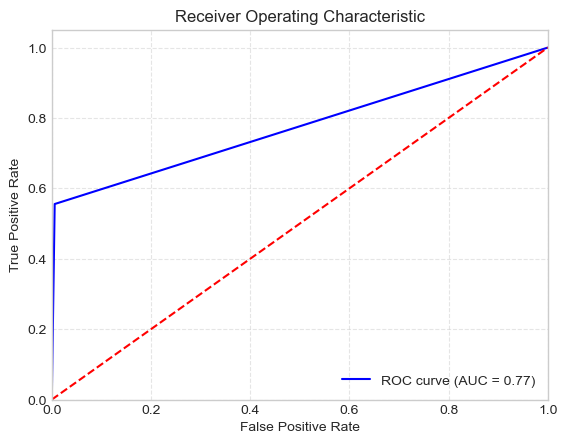

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Set plot style
plt.style.use('seaborn-whitegrid')

# Create a figure and axis
fig, ax = plt.subplots()

# Plot ROC curve
ax.plot(fpr, tpr, color='b', label='ROC curve (AUC = {:.2f})'.format(auc_score))
ax.plot([0, 1], [0, 1], color='r', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')

# Add legend
ax.legend(loc='lower right')

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()
